# Back Bay National Wildlife Refuge


> Back Bay National Wildlife Refuge is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish.

![BNWR](https://www.fws.gov/sites/default/files/styles/banner_image_xl/public/banner_images/2020-09/waterfowl%20%28tundras%29.jpg?h=0c8d0f81&itok=NcZlpD27)


To get introduced to the park and its history, please view the following interactive story map.

[BBNWR History and Introduction](https://storymaps.arcgis.com/stories/960d9db38cca4f3d8d38111119b9874f)

Additionally, here is some drone footage of the park for a better look at the geography and ecology of the area.

[BBNWR Drone Footage](https://www.youtube.com/watch?v=NlW330aBTCc)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import scipy.stats as sps
import statsmodels.stats.proportion as prop

In [2]:
bbnwr = pd.read_csv("./BKB_WaterQualityData_2020084.csv")
bbnwr.columns

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')

In [3]:
bbnwr["Site_Id"] = bbnwr["Site_Id"].replace({'d': 'D'})

## Question 1

### Q1a

The water in BBNWR is a mix of fresh water and sea water. Sea water has an average salinity of 35 ppt (parts per thousand). Because fresh water flows into the Bay, however, the level of salinity can be much lower, depending how much fresh water enters the system. Such systems are described through a tiered system of descriptions based on the amount of salt in the water.

A oligohaline mixture is one in which the saline content is between 0.5 - 5.0. More details on [classifying estuaries can be found in this EPA report](https://www.epa.gov/sites/default/files/2015-09/documents/2009_03_13_estuaries_monitor_chap14.pdf).

Let's test the theory that the measurements from the Bay come from a oligohaline mixture or a mixture with more saline content, so that salinity is more than 0.5.

For this hypothesis test will we use a $\alpha$-level (maximum Type I error probability) of $0.0015$.

Clearly state:

- The null hypothesis
- The alternative hypothesis
- A suitable test statistic
- The standard error of this test statistic
- A rejection region that will have probability of including the test statistic 0.0015 when the null hypothesis is true.

*Double click to add your answer* 
- The null hypothesis: The average salinity of the Bay is 0.5 ppt (H0: μ = 0.5).
- The alternative hypothesis: The average salinity of the Bay is greater than 0.5 ppt (H1: μ > 0.5).
- A suitable test statistic: The test statistic is the z-score calculated as (sample_mean - population_mean) / standard_error.
- The standard error of this test statistic: 0.025999988501600853.
- A rejection region that will have probability of including the test statistic 0.0015 when the null hypothesis is true: The rejection region is z > 2.9677379253417944.



### Q1b

Now that we have described our hypothesis test, compute all quantities needed to compute the test statistic, standard error, and rejection region. You may find it helpful to create a table that only includes observations from the Bay with non-missing values for "Salinity (ppt)".

In [5]:
# compute quantities
# Filter the data to include only non-missing values for "Salinity (ppt)"
salinity_data = bbnwr[bbnwr["Salinity (ppt)"].notna()]["Salinity (ppt)"]

# Compute the sample mean and sample size
sample_mean = salinity_data.mean()
sample_size = len(salinity_data)

# Population mean under the null hypothesis
population_mean = 0.5

# Compute the sample standard deviation
sample_std = salinity_data.std(ddof=1)

# Compute the standard error of the mean
standard_error = sample_std / np.sqrt(sample_size)

# Compute the test statistic
test_statistic = (sample_mean - population_mean) / standard_error

# Compute the critical value for the rejection region
alpha = 0.0015
critical_value = sps.norm.ppf(1 - alpha)

sample_mean, sample_size, sample_std, standard_error, test_statistic, critical_value

(0.7170682730923694,
 2241,
 1.2308186950436066,
 0.025999988501600853,
 8.348783426538986,
 2.9677379253417944)

### Q1c

Perform the hypothesis test. Clearly state whether you reject or fail to reject the null hypothesis. Interpret this result with result to the original question of whether the average salinity of the Bay is consistent with a oligohaline (or more extreme) mixture.


In [6]:
# perform test

if test_statistic > critical_value:
    result = "reject"
else:
    result = "fail to reject"

result

'reject'

### Q1d

We could also approach this question by creating a confidence interval for the average salinity in the population of all measurements in the Bay.

Using the quantities above, create a 99.7% confidence interval of the average salinity of the Bay. What does this interval tell us about the following table of salinity mixture tiers:

| Level | Salinity |
| ----- | -------- |
| Fresh Water | < 0.5 ppt |
| Oligohaline | 0.5 -- 5.0 ppt|
| Mesohaline | 5.0-18.0 ppt|
| Polyhaline | 18.0­ -- 30 ppt |
| Ocean | > 30 ppt |


In [9]:
# confidence interval
# Calculate the z-score for the 99.7% confidence interval
z_score = sps.norm.ppf(1 - alpha / 2)

# Calculate the margin of error
margin_of_error = z_score * standard_error

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

confidence_interval

(0.634526537882316, 0.7996100083024228)

Which of these levels can be ruled out for the Bay?

*Double click to add your answer*

The confidence interval for the average salinity of the Bay is (0.6345, 0.7996). Based on this interval, we can rule out the following levels for the Bay:

- Fresh Water (< 0.5 ppt)
- Mesohaline (5.0-18.0 ppt)
- Polyhaline (18.0-30 ppt)
- Ocean (> 30 ppt)

The salinity of the Bay falls within the Oligohaline range (0.5 -- 5.0 ppt).

## Question 2

### Q2a

A [Secchi disk](https://en.wikipedia.org/wiki/Secchi_disk) is a device used to measure the clarity of water by submerging the disk and measuring the depth at which it is no longer visible.

![Secchi Disk](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Secchi_disk_pattern.svg/240px-Secchi_disk_pattern.svg.png)

A common definition of "clear water" is being able to view a Secchi disk at 4m. In the case of the BBNWR, most of the depths are less than 4m:


<Axes: xlabel='Water Depth (m)', ylabel='Count'>

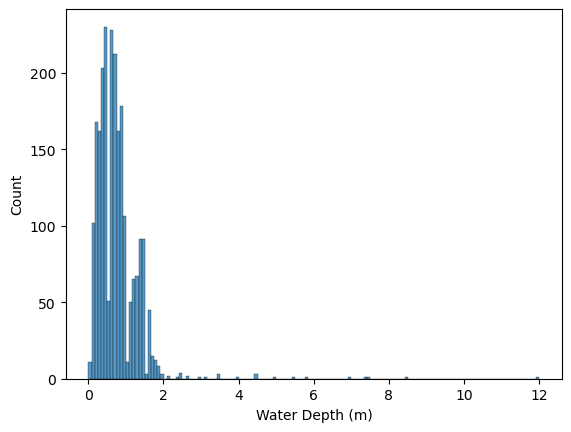

In [10]:
sb.histplot(data = bbnwr, x = "Water Depth (m)")

Create a new column "clear" that is `True` if either of the following conditions is met:

- The "Secchi Depth (m)" is at least 4m
- The "Secchi Depth (m)" is at least as large as the "Water Depth (m)" (due to small differences due to waves/location/etc
 Secchi Depth can be (slightly) greater than Water Depth)

 Display the proportion of "clear" observations.





In [11]:
# proprotion of clear observations
bbnwr["clear"] = (bbnwr["Secchi Depth (m)"] >= 4) | (bbnwr["Secchi Depth (m)"] >= bbnwr["Water Depth (m)"])
clear_proportion = bbnwr["clear"].mean()
clear_proportion

0.3888654576128216

### Q2b

Test the hypothesis  that the population proportion of clear measurements is 37% against the alternative that it is not equal to 37%.

Use $\alpha = 0.05$. Clearly state if you reject or fail to reject this hypothesis.

In [12]:
# test
# Hypothesis test for population proportion
population_proportion = 0.37
sample_proportion = clear_proportion
sample_size = len(bbnwr)

# Compute the standard error for the proportion
standard_error_proportion = np.sqrt((population_proportion * (1 - population_proportion)) / sample_size)

# Compute the test statistic
test_statistic_proportion = (sample_proportion - population_proportion) / standard_error_proportion

# Compute the critical value for the rejection region
alpha = 0.05
critical_value_proportion = sps.norm.ppf(1 - alpha / 2)

# Determine if we reject or fail to reject the null hypothesis
if abs(test_statistic_proportion) > critical_value_proportion:
    result_proportion = "reject"
else:
    result_proportion = "fail to reject"

result_proportion

'fail to reject'

*Double click to add your answer*

### Q2c

Referring the result from the previous section, compute the $p$-value for this hypothesis.

In [14]:
# you will find sps.norm.cdf helpful

# Compute the p-value for the hypothesis test
p_value = 2 * (1 - sps.norm.cdf(abs(test_statistic_proportion)))
p_value

0.05708446897063846

Consider three different people:

- Person A has a 10% tolerance for Type I errors
- Person B has a 5% tolerance for Type I errors
- Person C has a 1% tolerance for Type I errors


Which of these people (if any) would reject the null hypothesis that 40% of all possible measurements would be clear. Justify your answer.

Person A would reject the null hypothesis because their tolerance for Type I errors (10%) is higher than the p-value (0.057).

Person B would fail to reject the null hypothesis because their tolerance for Type I errors (5%) is lower than the p-value (0.057).

Person C would fail to reject the null hypothesis because their tolerance for Type I errors (1%) is much lower than the p-value (0.057).

### Q2d

Using values you computed in the previous sections, create a 95% confidence interval for the proportion of clear observations in the population of all observations.

Note: you will need to use the estimated standard error of the sample proportion ($\hat p$) of: $\sqrt{\frac{\hat p(1-\hat p)}{n}}$.

Interpret this result in words.

In [30]:
# confidence interval

# Calculate the standard error for the sample proportion
standard_error_proportion = np.sqrt((sample_proportion * (1 - sample_proportion)) / sample_size)

# Calculate the z-score for the 95% confidence interval
z_score_95 = sps.norm.ppf(1 - alpha / 2)

# Calculate the margin of error
margin_of_error_95 = z_score_95 * standard_error_proportion

# Calculate the confidence interval
confidence_interval_95 = (sample_proportion - margin_of_error_95, sample_proportion + margin_of_error_95)

confidence_interval_95


# Interpretation
# The 95% confidence interval for the proportion of clear observations is (0.3692, 0.4085). This interval means that we are 95% confident that the true proportion of clear observations in the population lies between 36.92% and 40.85%. Since this interval does not include 37%, it suggests that the true proportion of clear observations is different from 37%.

(0.36924313492794025, 0.40848778029770294)

*Double click to add your answer*
## Question 3

### Q3a

Recall that if there is no relationship between two variables (i.e., they are statistically independent in the population), then the correlation coefficient will be zero (or more generally, if there is no linear relationship).

Using the standard error for a correlation coefficient. Test the hypothesis that the correlation between "AirTemp (C)" and "Water Temp (?C)" is zero against the alternative that it is non-zero. Use an $\alpha$-level of 0.05.

Note: it is helpful to create a table that only these two variables and no missing values.

In [28]:
# test
# Filter the data to include only non-missing values for "AirTemp (C)" and "Water Temp (?C)"
temp_data = bbnwr[["AirTemp (C)", "Water Temp (?C)"]].dropna()

# Compute the correlation coefficient
correlation_coefficient = temp_data["AirTemp (C)"].corr(temp_data["Water Temp (?C)"])

# Compute the standard error for the correlation coefficient
n = len(temp_data)
standard_error_corr = 1 / np.sqrt(n - 3)

# Compute the test statistic
test_statistic_corr = correlation_coefficient / standard_error_corr

# Compute the critical value for the rejection region
critical_value_corr = sps.norm.ppf(1 - alpha / 2)

# Determine if we reject or fail to reject the null hypothesis
if abs(test_statistic_corr) > critical_value_corr:
    result_corr = "reject"
else:
    result_corr = "fail to reject"

correlation_coefficient, test_statistic_corr, critical_value_corr, result_corr



(0.6803449857846121, 32.25007467256545, 1.959963984540054, 'reject')

Interpret this result. Would you reject the hypothesis that there is no linear relationship between these two variables (in the population)?

*Double click to add your answer*

```markdown
Given that the test statistic (32.25) is greater than the critical value (1.96), we reject the null hypothesis that there is no linear relationship between "AirTemp (C)" and "Water Temp (?C)". This suggests that there is a statistically significant linear relationship between these two variables in the population.
```

### Q3b

Create two confidence intervals for the population correlation coefficient:

- a 95% CI
- a 99.7% CI



In [27]:
# confidence intervals

fisher_z = np.arctanh(correlation_coefficient)

# Calculate the standard error for the Fisher transformation
se_fisher = 1 / np.sqrt(n - 3)

# Calculate the z-scores for the confidence intervals
z_score_95 = sps.norm.ppf(1 - 0.05 / 2)
z_score_997 = sps.norm.ppf(1 - 0.003 / 2)

# Calculate the confidence intervals in the Fisher transformed space
ci_fisher_95 = (fisher_z - z_score_95 * se_fisher, fisher_z + z_score_95 * se_fisher)
ci_fisher_997 = (fisher_z - z_score_997 * se_fisher, fisher_z + z_score_997 * se_fisher)

# Transform the confidence intervals back to the correlation coefficient space
ci_95 = (np.tanh(ci_fisher_95[0]), np.tanh(ci_fisher_95[1]))
ci_997 = (np.tanh(ci_fisher_997[0]), np.tanh(ci_fisher_997[1]))

ci_95, ci_997



((0.6575066749718924, 0.7019342435071243),
 (0.6452685110547737, 0.7125589970403235))

Which interval is wider? Explain why we know this would be true without ever calculating the intervals.

*Double click to add your answer*

The 99.7% confidence interval is wider. This is because a higher confidence level requires a larger margin of error to ensure that the true parameter value is captured within the interval. Therefore, the interval must be wider to account for the increased confidence level.

## Question 4

Let's investigate if the locations of the measurements are related to the time of year of the measurement. In other words, do the people taking the measurements favor different sites at different times of the year.
```

In [19]:
bbnwr["Date"] = pd.to_datetime(bbnwr["Read_Date"])

### Q4a

Create a table that only includes the columns "Site_Id" and "Date". Then, create a new column "Month" that is the month of the date of the measurement (using the `.dt.month` attribute of the `"Date"` column created above). Plot the distribution of this variable.

/var/folders/y6/srfzmfb50kv5y_ydzjycdsbm0000gn/T/ipykernel_41240/1867406296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_date_table["Month"] = site_date_table["Date"].dt.month


<Axes: xlabel='Month', ylabel='Count'>

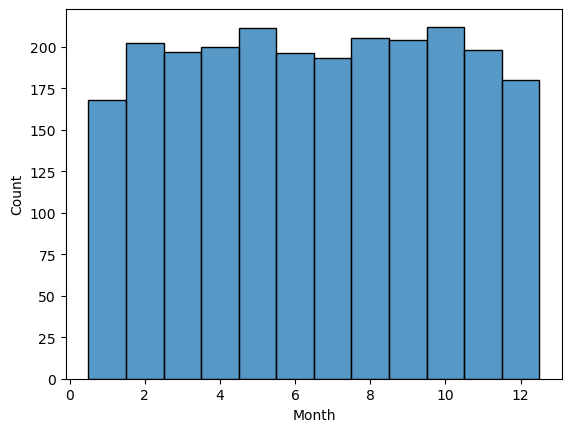

In [20]:
# month plot
# Create a table with only the columns "Site_Id" and "Date"
site_date_table = bbnwr[["Site_Id", "Date"]]

# Create a new column "Month" that is the month of the date of the measurement
site_date_table["Month"] = site_date_table["Date"].dt.month

# Plot the distribution of the "Month" variable
sb.histplot(data=site_date_table, x="Month", discrete=True)

### Q4b

We have noted that one way to think about independence is by thing about conditional distributions. If two variables are independent, then the conditional distribution of one variable should be the same regardless of conditioning on the value of the other variable.

Create a plot that shows the conditional distribution of Site_Id for each value of month. Note: the `histplot` method has two arguments that are helpful -- `multipel = 'fill'` anad `discrete = True`.

<Axes: xlabel='Month', ylabel='Count'>

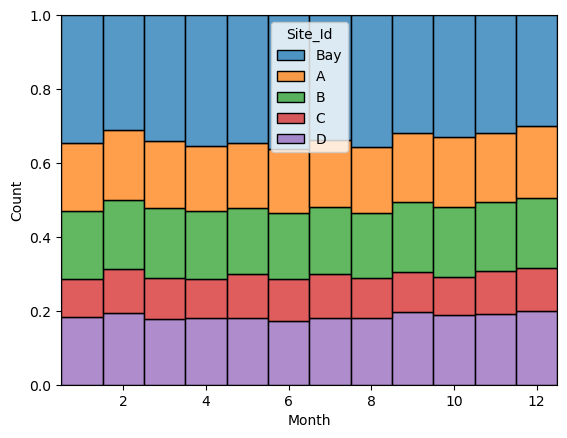

In [21]:
# plots
sb.histplot(data=site_date_table, x="Month", hue="Site_Id", multiple="fill", discrete=True)

What do you notice about the conditional distributions? Does this suggest that the variables are independent?

*Double click to add interpretation*

The proportion of each "Site_Id" does not significantly change from one month to another. This suggests that the variables "Site_Id" and "Month" are independent.

### Q4c

Create the *contingency table* for the variables "Site_Id" and "Month". Print out this table. What do you notice about the row or column (this will depend on how you order the data) that represents the "Bay" site? This row/column will look different than the others. Is this evidence that the the variables are dependent? Why or why not?

In [ ]:
# print out table
# Create the contingency table
contingency_table = pd.crosstab(site_date_table["Site_Id"], site_date_table["Month"])

# Print the contingency table
print(contingency_table)

# the value in Bay is significantly higher in Bay than otehr sites. it is not the evidentce of dependdence. We should use chi-square test to test the independence of the two variables.

Month    1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
Site_Id                                                                     
A          31    38    36    35    37    34    35    37    38    40    37   
B          31    38    37    37    38    35    35    36    39    40    37   
Bay        58    63    67    71    73    71    65    73    65    70    63   
C          17    24    22    21    25    22    23    22    22    22    23   
D          31    39    35    36    38    34    35    37    40    40    38   

Month    12.0  
Site_Id        
A          35  
B          34  
Bay        54  
C          21  
D          36  


### Q4d

Using the `sps.chi2_contingency` function, perform a $\chi^2$ test for independence between these two variables. Use an $\alpha$-level of 0.05. Report if you would reject the null hypothesis that the variables are independent. Write, in words, your conclusion to the question of whether different sites were favored in particular months.

In [26]:
# compute p-value
# Perform the chi-square test for independence
chi2_stat, p_value, dof, expected = sps.chi2_contingency(contingency_table)

# Determine if we reject or fail to reject the null hypothesis
if p_value < 0.05:
    result_chi2 = "reject"
else:
    result_chi2 = "fail to reject"

chi2_stat, p_value, dof, result_chi2

(4.717058895508418, 0.9999999999999852, 44, 'fail to reject')

** The very high p-value indicates that there is no statistically significant association between "Site_Id" and "Month."